In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка DataSet

In [2]:
df_x_nup = pd.read_excel(io='c:\Intel\X_nup.xlsx', engine='openpyxl')
df_x_bp = pd.read_excel(io='c:\Intel\X_bp.xlsx', engine='openpyxl')
df_all = df_x_bp.merge(df_x_nup, left_index = True, right_index = True, how = 'inner')

In [3]:
df_all

,Unnamed: 0_x,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Unnamed: 0_y,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,0,4.000000,57.000000
1,1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,1,0,4.000000,60.000000
2,2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,2,0,4.000000,70.000000
3,3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,3,0,5.000000,47.000000
4,4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,4,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1018,90,9.076380,47.019770
1019,1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1019,90,10.565614,53.750790
1020,1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1020,90,4.161154,67.629684
1021,1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1021,90,6.313201,58.261074


In [4]:
del df_all['Unnamed: 0_x']
del df_all['Unnamed: 0_y']

In [5]:
df_all

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


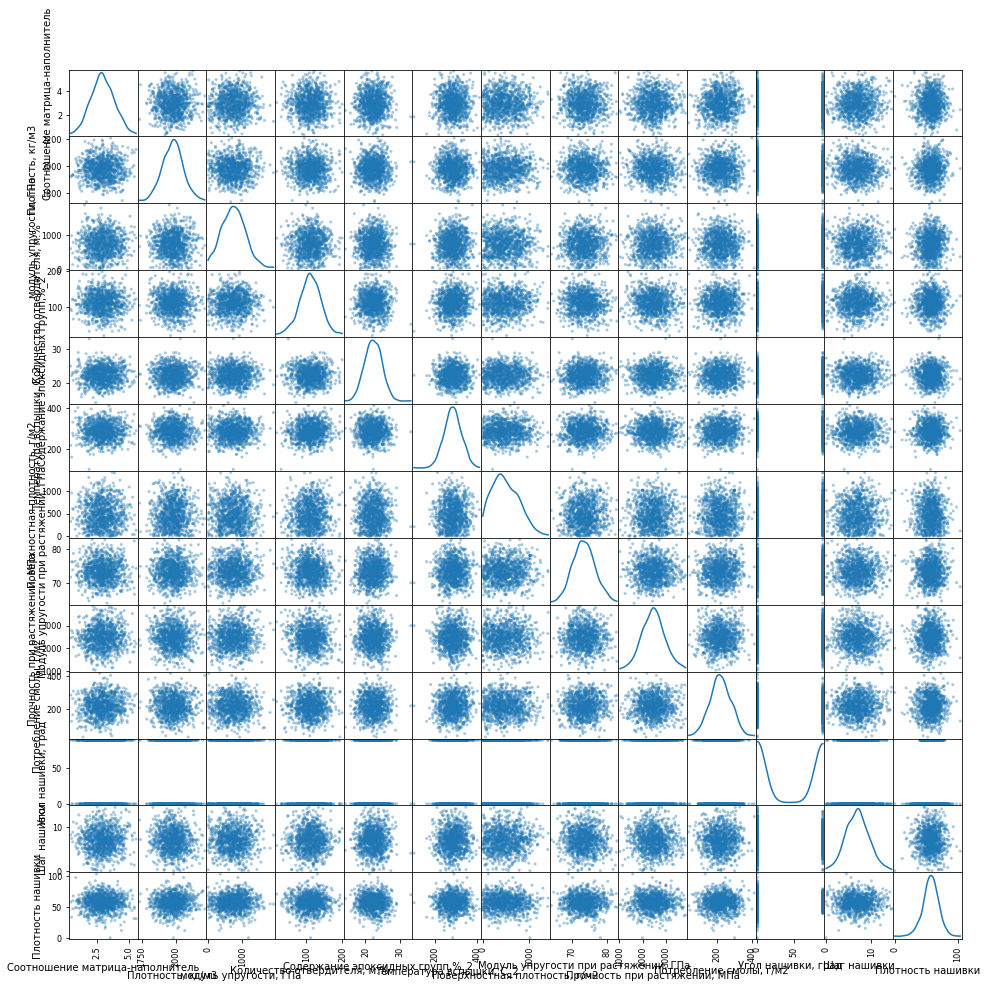

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_all, alpha=0.4, figsize=(16,16), diagonal='kde');

<AxesSubplot:>

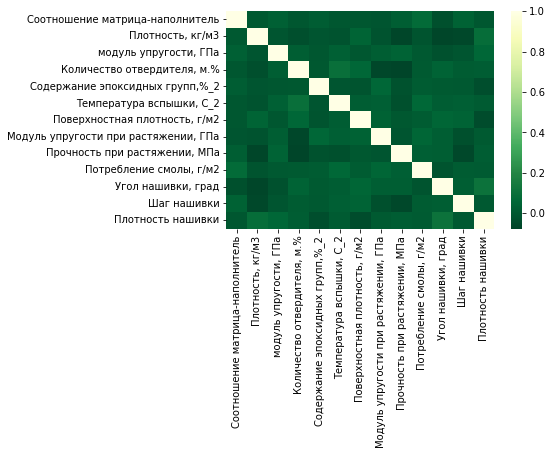

In [7]:
sns.heatmap(df_all.corr(), cmap='YlGn_r')

## Ящик с усами для каждой переменной

In [8]:
from matplotlib.pyplot import boxplot

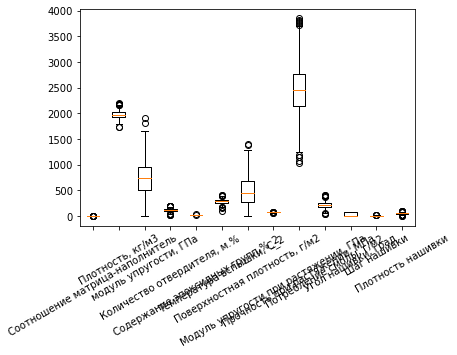

In [9]:
boxplot(df_all)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], ["Соотношение матрица-наполнитель", 
                                                         "Плотность, кг/м3", 
                                                         "модуль упругости, ГПа", 
                                                         "Количество отвердителя, м.%", 
                                                         "Содержание эпоксидных групп,%_2", 
                                                         "Температура вспышки, С_2", 
                                                         "Поверхностная плотность, г/м2", 
                                                         "Модуль упругости при растяжении, ГПа", 
                                                         "Прочность при растяжении, МПа", 
                                                         "Потребление смолы, г/м2", 
                                                         "Угол нашивки, град", 
                                                         "Шаг нашивки", 
                                                         "Плотность нашивки",], rotation=30);

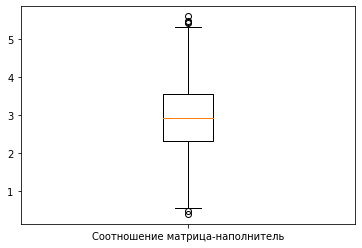

In [10]:
boxplot(df_all["Соотношение матрица-наполнитель"])
plt.xticks([1], ["Соотношение матрица-наполнитель"], rotation=0);

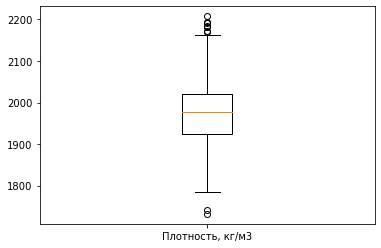

In [11]:
boxplot(df_all["Плотность, кг/м3"])
plt.xticks([1], ["Плотность, кг/м3"], rotation=0);

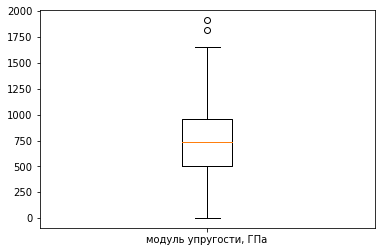

In [12]:
boxplot(df_all["модуль упругости, ГПа"])
plt.xticks([1], ["модуль упругости, ГПа"], rotation=0);

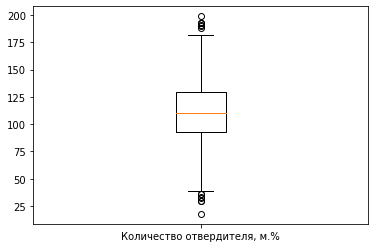

In [13]:
boxplot(df_all["Количество отвердителя, м.%"])
plt.xticks([1], ["Количество отвердителя, м.%"], rotation=0);

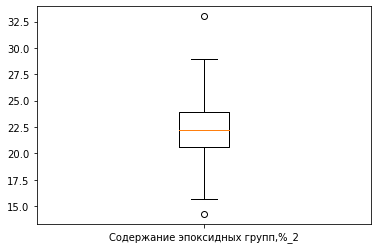

In [14]:
boxplot(df_all["Содержание эпоксидных групп,%_2"])
plt.xticks([1], ["Содержание эпоксидных групп,%_2"], rotation=0);

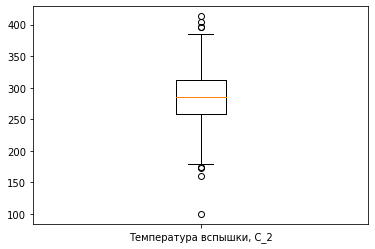

In [15]:
boxplot(df_all["Температура вспышки, С_2"])
plt.xticks([1], ["Температура вспышки, С_2"], rotation=0);

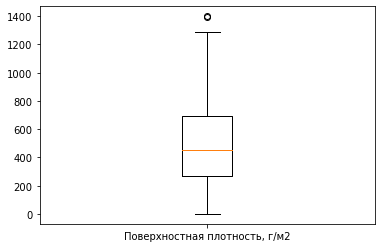

In [16]:
boxplot(df_all["Поверхностная плотность, г/м2"])
plt.xticks([1], ["Поверхностная плотность, г/м2"], rotation=0);

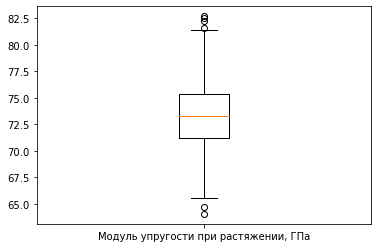

In [17]:
boxplot(df_all["Модуль упругости при растяжении, ГПа"])
plt.xticks([1], ["Модуль упругости при растяжении, ГПа"], rotation=0);

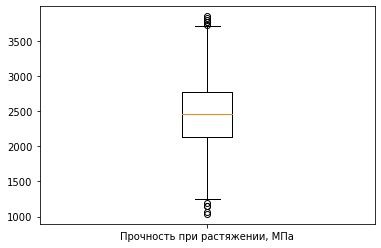

In [18]:
boxplot(df_all["Прочность при растяжении, МПа"]);
plt.xticks([1], ["Прочность при растяжении, МПа"], rotation=0);

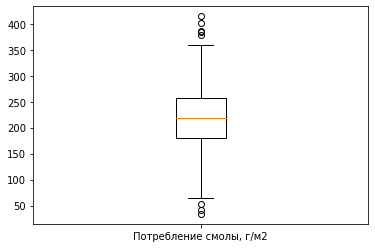

In [19]:
boxplot(df_all["Потребление смолы, г/м2"])
plt.xticks([1], ["Потребление смолы, г/м2"], rotation=0);

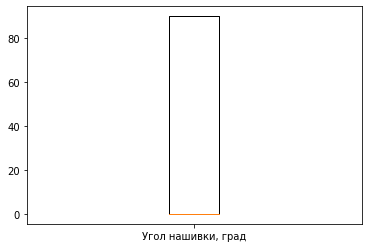

In [20]:
boxplot(df_all["Угол нашивки, град"])
plt.xticks([1], ["Угол нашивки, град"], rotation=0);

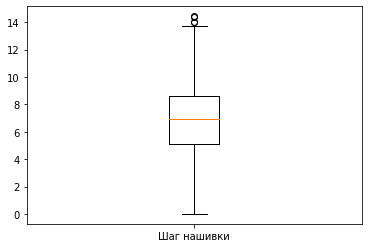

In [21]:
boxplot(df_all["Шаг нашивки"])
plt.xticks([1], ["Шаг нашивки"], rotation=0);

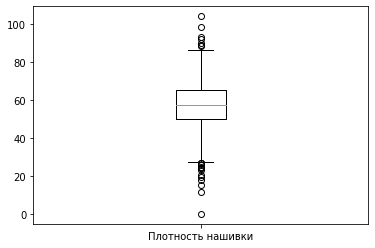

In [22]:
boxplot(df_all["Плотность нашивки"]);
plt.xticks([1], ["Плотность нашивки"], rotation=0);

## Среднее и медианное значиня, стандартное отклонение

In [23]:
df_all.mean(axis=0)

Соотношение матрица-наполнитель            2.930366
Плотность, кг/м3                        1975.734888
модуль упругости, ГПа                    739.923233
Количество отвердителя, м.%              110.570769
Содержание эпоксидных групп,%_2           22.244390
Температура вспышки, С_2                 285.882151
Поверхностная плотность, г/м2            482.731833
Модуль упругости при растяжении, ГПа      73.328571
Прочность при растяжении, МПа           2466.922843
Потребление смолы, г/м2                  218.423144
Угол нашивки, град                        44.252199
Шаг нашивки                                6.899222
Плотность нашивки                         57.153929
dtype: float64

In [24]:
df_all.std(axis=0)

Соотношение матрица-наполнитель           0.913222
Плотность, кг/м3                         73.729231
модуль упругости, ГПа                   330.231581
Количество отвердителя, м.%              28.295911
Содержание эпоксидных групп,%_2           2.406301
Температура вспышки, С_2                 40.943260
Поверхностная плотность, г/м2           281.314690
Модуль упругости при растяжении, ГПа      3.118983
Прочность при растяжении, МПа           485.628006
Потребление смолы, г/м2                  59.735931
Угол нашивки, град                       45.015793
Шаг нашивки                               2.563467
Плотность нашивки                        12.350969
dtype: float64

In [25]:
df_all.median(axis=0)

Соотношение матрица-наполнитель            2.906878
Плотность, кг/м3                        1977.621657
модуль упругости, ГПа                    739.664328
Количество отвердителя, м.%              110.564840
Содержание эпоксидных групп,%_2           22.230744
Температура вспышки, С_2                 285.896812
Поверхностная плотность, г/м2            451.864365
Модуль упругости при растяжении, ГПа      73.268805
Прочность при растяжении, МПа           2459.524526
Потребление смолы, г/м2                  219.198882
Угол нашивки, град                         0.000000
Шаг нашивки                                6.916144
Плотность нашивки                         57.341920
dtype: float64

## Поиск пропусков

In [26]:
df_all.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

## Поиск выбросов

## Метод трёх сигм

In [27]:
def plot_scatter(x, y, title, x_label, ylabel, c="b"):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(ylabel)
    plt.scatter(x, y, c=c)
    plt.show()

In [28]:
def plot_hist(x, title="", xlabel=""):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Количество")
    plt.hist(x, bins = 30)
    plt.show()

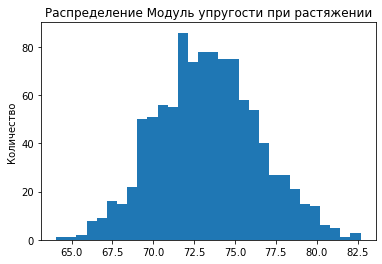

In [29]:
plot_hist(df_all["Модуль упругости при растяжении, ГПа"], title="Распределение Модуль упругости при растяжении", xlabel="")

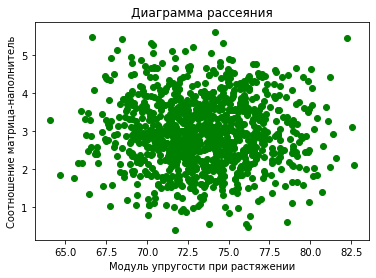

In [30]:
plot_scatter(df_all["Модуль упругости при растяжении, ГПа"], df_all["Соотношение матрица-наполнитель"], 
             "Диаграмма рассеяния", "Модуль упругости при растяжении", "Соотношение матрица-наполнитель", c="g")

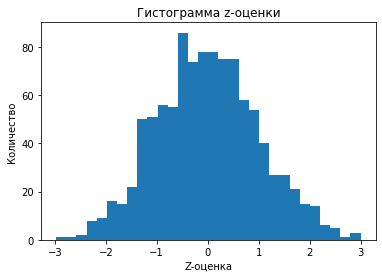

In [31]:
df_all["Модуль упругости при растяжении, ГПа_z"] = (df_all["Модуль упругости при растяжении, ГПа"] - df_all["Модуль упругости при растяжении, ГПа"].mean()) / df_all["Модуль упругости при растяжении, ГПа"].std()

plot_hist(df_all["Модуль упругости при растяжении, ГПа_z"], title="Гистограмма z-оценки", xlabel="Z-оценка")

In [32]:
df_all["Модуль упругости при растяжении, ГПа_z"] > 2

0       False
1       False
2       False
3       False
4       False
        ...  
1018    False
1019    False
1020    False
1021    False
1022    False
Name: Модуль упругости при растяжении, ГПа_z, Length: 1023, dtype: bool

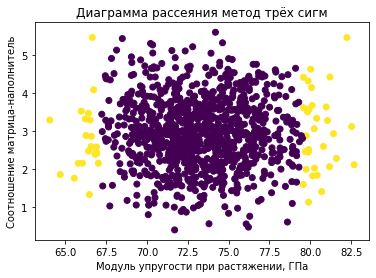

In [33]:
plot_scatter(df_all["Модуль упругости при растяжении, ГПа"], df_all["Соотношение матрица-наполнитель"], "Диаграмма рассеяния метод трёх сигм", "Модуль упругости при растяжении, ГПа", "Соотношение матрица-наполнитель", 
             c=abs(df_all["Модуль упругости при растяжении, ГПа_z"]) > 2)

In [34]:
df_preprocessed_sig = df_all[df_all["Модуль упругости при растяжении, ГПа_z"] <= 2]

In [35]:
del df_preprocessed_sig['Модуль упругости при растяжении, ГПа_z']

In [36]:
df_preprocessed_sig

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


### Изолированный Лес

In [37]:
from sklearn.ensemble import IsolationForest

In [38]:
isf = IsolationForest(n_estimators = 200, random_state = 42, contamination = 0.02)

In [39]:
preds = isf.fit_predict(df_all[["Модуль упругости при растяжении, ГПа", "Соотношение матрица-наполнитель"]])
df_all["iso_forest_outliers"] = preds
df_all["iso_forest_scores"] = isf.decision_function(df_all[["Модуль упругости при растяжении, ГПа", "Соотношение матрица-наполнитель"]])
print(df_all["iso_forest_outliers"].value_counts())

 1    1002
-1      21
Name: iso_forest_outliers, dtype: int64


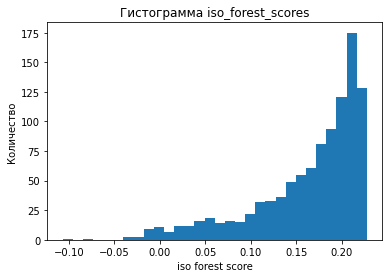

In [40]:
plot_hist(df_all["iso_forest_scores"], title="Гистограмма iso_forest_scores", xlabel="iso forest score")

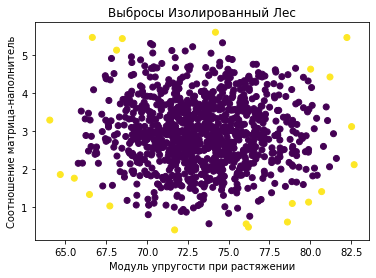

In [41]:
plot_scatter(df_all["Модуль упругости при растяжении, ГПа"], df_all["Соотношение матрица-наполнитель"], "Выбросы Изолированный Лес", 
             "Модуль упругости при растяжении", "Соотношение матрица-наполнитель", c=df_all["iso_forest_outliers"] == -1)

In [42]:
df_preprocessed_for = df_all[df_all["iso_forest_outliers"] > 0]

In [43]:
del df_preprocessed_for['iso_forest_outliers']
del df_preprocessed_for['iso_forest_scores']
del df_preprocessed_for['Модуль упругости при растяжении, ГПа_z']

In [44]:
df_preprocessed_for

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


## Стандартизация 

#### Вид не стандартизированных данных

In [45]:
df_preprocessed_for.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of       Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    4

In [46]:
df_preprocessed_for.std

<bound method NDFrame._add_numeric_operations.<locals>.std of       Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49

#### Стандартизация

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_preprocessed_for),
           columns = df_preprocessed_for.columns, index = df_preprocessed_for.index)



In [49]:
df_std

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274141,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.266197,0.698235,0.488979,0.0,0.276998,0.548135
1,0.274141,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.266197,0.698235,0.488979,0.0,0.276998,0.576985
2,0.274141,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.266197,0.698235,0.488979,0.0,0.276998,0.673149
3,0.274141,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.266197,0.698235,0.488979,0.0,0.346248,0.451971
4,0.466091,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.266197,0.698235,0.488979,0.0,0.346248,0.548135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361111,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.461816,0.480312,0.239516,1.0,0.628535,0.452161
1019,0.607335,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.451049,0.470745,0.220404,1.0,0.731664,0.516890
1020,0.573022,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.565822,0.578340,0.532590,1.0,0.288158,0.650355
1021,0.662205,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.522050,0.368070,0.428909,1.0,0.437186,0.560262


#### Стандартизтрованные данные

In [50]:
df_std.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of       Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            0.274141          0.626533   
1                            0.274141          0.626533   
2                            0.274141          0.626533   
3                            0.274141          0.626533   
4                            0.466091          0.626533   
...                               ...               ...   
1018                         0.361111          0.462855   
1019                         0.607335          0.668737   
1020                         0.573022          0.505470   
1021                         0.662205          0.703842   
1022                         0.683763          0.333290   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                  0.385679                     0.067654   
1                  0.385679                     0.178021   
2                  0.385679                     

In [51]:
df_std.std

<bound method NDFrame._add_numeric_operations.<locals>.std of       Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            0.274141          0.626533   
1                            0.274141          0.626533   
2                            0.274141          0.626533   
3                            0.274141          0.626533   
4                            0.466091          0.626533   
...                               ...               ...   
1018                         0.361111          0.462855   
1019                         0.607335          0.668737   
1020                         0.573022          0.505470   
1021                         0.662205          0.703842   
1022                         0.683763          0.333290   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                  0.385679                     0.067654   
1                  0.385679                     0.178021   
2                  0.385679                     0

#### Данные после стандартизации

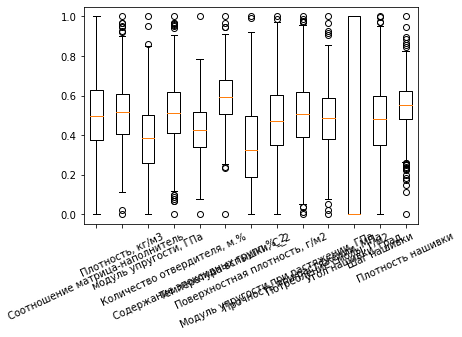

In [52]:
boxplot(df_std)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 
           ["Соотношение матрица-наполнитель", 
                                                         "Плотность, кг/м3", 
                                                         "модуль упругости, ГПа", 
                                                         "Количество отвердителя, м.%", 
                                                         "Содержание эпоксидных групп,%_2", 
                                                         "Температура вспышки, С_2", 
                                                         "Поверхностная плотность, г/м2", 
                                                         "Модуль упругости при растяжении, ГПа", 
                                                         "Прочность при растяжении, МПа", 
                                                         "Потребление смолы, г/м2", 
                                                         "Угол нашивки, град", 
                                                         "Шаг нашивки", 
                                                         "Плотность нашивки",], rotation=25);

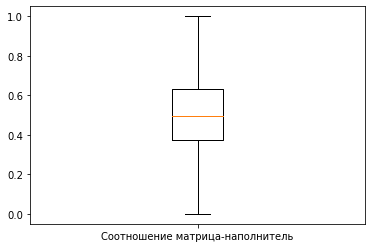

In [53]:
boxplot(df_std["Соотношение матрица-наполнитель"])
plt.xticks([1], ["Соотношение матрица-наполнитель"], rotation=0);

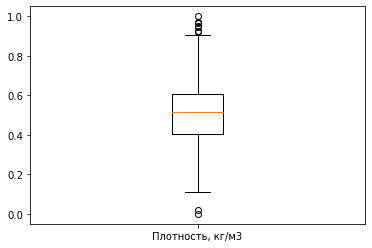

In [54]:
boxplot(df_std["Плотность, кг/м3"])
plt.xticks([1], ["Плотность, кг/м3"], rotation=0);

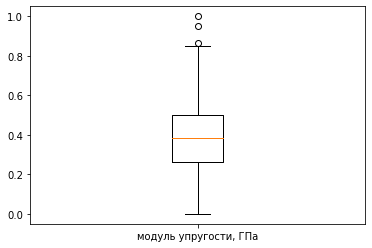

In [55]:
boxplot(df_std["модуль упругости, ГПа"])
plt.xticks([1], ["модуль упругости, ГПа"], rotation=0);

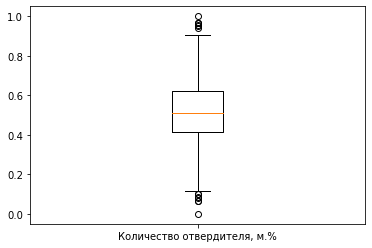

In [56]:
boxplot(df_std["Количество отвердителя, м.%"])
plt.xticks([1], ["Количество отвердителя, м.%"], rotation=0);

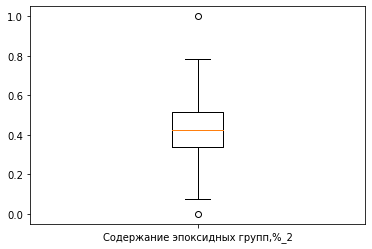

In [57]:
boxplot(df_std["Содержание эпоксидных групп,%_2"])
plt.xticks([1], ["Содержание эпоксидных групп,%_2"], rotation=0);

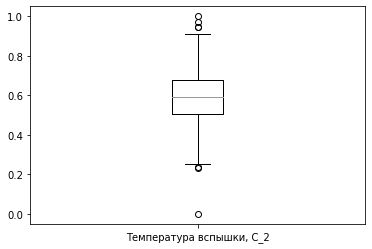

In [58]:
boxplot(df_std["Температура вспышки, С_2"])
plt.xticks([1], ["Температура вспышки, С_2"], rotation=0);

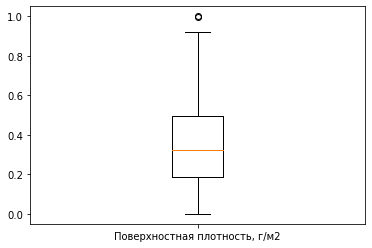

In [59]:
boxplot(df_std["Поверхностная плотность, г/м2"])
plt.xticks([1], ["Поверхностная плотность, г/м2"], rotation=0);

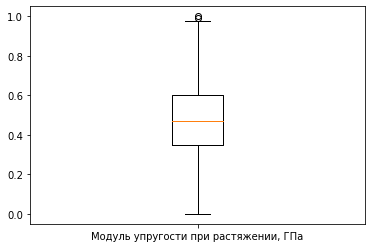

In [60]:
boxplot(df_std["Модуль упругости при растяжении, ГПа"])
plt.xticks([1], ["Модуль упругости при растяжении, ГПа"], rotation=0);

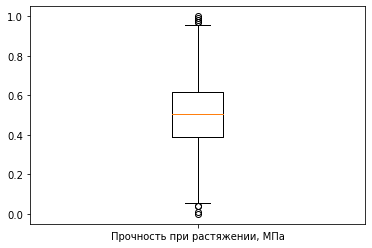

In [61]:
boxplot(df_std["Прочность при растяжении, МПа"]);
plt.xticks([1], ["Прочность при растяжении, МПа"], rotation=0);

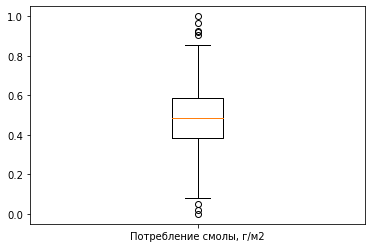

In [62]:
boxplot(df_std["Потребление смолы, г/м2"])
plt.xticks([1], ["Потребление смолы, г/м2"], rotation=0);

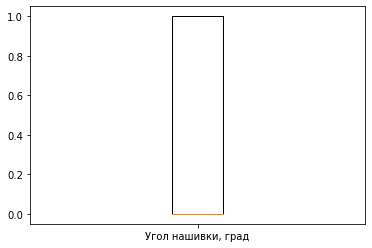

In [63]:
boxplot(df_std["Угол нашивки, град"])
plt.xticks([1], ["Угол нашивки, град"], rotation=0);

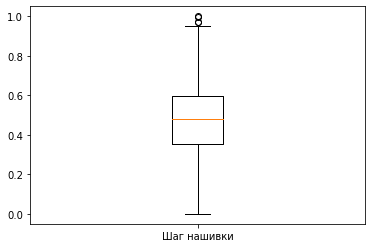

In [64]:
boxplot(df_std["Шаг нашивки"])
plt.xticks([1], ["Шаг нашивки"], rotation=0);

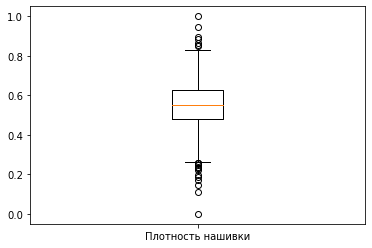

In [65]:
boxplot(df_std["Плотность нашивки"]);
plt.xticks([1], ["Плотность нашивки"], rotation=0);

## Построение моделей

In [66]:
df_cp = df_std.copy()

Разбиваем данные на обучающую и тестовую выборки

In [67]:
X = df_cp
y_up = X.pop('Модуль упругости при растяжении, ГПа')
y_pr = X.pop('Прочность при растяжении, МПа')

In [68]:
y_up

0       0.266197
1       0.266197
2       0.266197
3       0.266197
4       0.266197
          ...   
1018    0.461816
1019    0.451049
1020    0.565822
1021    0.522050
1022    0.538948
Name: Модуль упругости при растяжении, ГПа, Length: 1002, dtype: float64

In [69]:
y_pr

0       0.698235
1       0.698235
2       0.698235
3       0.698235
4       0.698235
          ...   
1018    0.480312
1019    0.470745
1020    0.578340
1021    0.368070
1022    0.647135
Name: Прочность при растяжении, МПа, Length: 1002, dtype: float64

Разбиваем данные на тестовые и тренировочные выборку, где тестовая выьорка 30% 

In [70]:
from sklearn.model_selection import train_test_split


X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X, y_up, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(X, y_pr, test_size=0.3, random_state=1)

Линейная регрессия

In [71]:
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [72]:
lr = LinearRegression()

lr_params = {
    'fit_intercept' : ['True', 'False']}

lnreg_up = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
lnreg_up.fit(X_train_up, y_train_up)
lnreg_up.best_params_

{'fit_intercept': 'True'}

In [73]:
lr_up = lnreg_up.best_estimator_

In [74]:
lnreg_up_result = pd.DataFrame({
   'Model Name': 'LinearRegression', 'MAE': mean_absolute_error(y_test_up, lr_up.predict(X_test_up)), 
   'MSE': mean_squared_error(y_test_up, lr_up.predict(X_test_up)),'R2 score': lr_up.score(X_test_up, y_test_up).round(4)
}, index=['Модуль упругости при растяжении'])

In [75]:
test_results = pd.DataFrame()

In [76]:
test_results = test_results.append(lnreg_up_result)
test_results

,Model Name,MAE,MSE,R2 score
Модуль упругости при растяжении,LinearRegression,0.156651,0.037599,-0.0185


In [77]:
lr = LinearRegression()

lr_params = {
    'fit_intercept' : ['True', 'False']}

lnreg_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
lnreg_pr.fit(X_train_pr, y_train_pr)
lnreg_pr.best_params_

{'fit_intercept': 'True'}

In [78]:
lr_pr = lnreg_pr.best_estimator_

In [79]:
lnreg_pr_result = pd.DataFrame({
   'Model Name': 'LinearRegression', 'MAE': mean_absolute_error(y_test_pr, lr_pr.predict(X_test_pr)), 
   'MSE': mean_squared_error(y_test_pr, lr_pr.predict(X_test_pr)),'R2 score': lr_pr.score(X_test_pr, y_test_pr).round(4)
}, index=['Прочность при растяжении'])

In [80]:
test_results = test_results.append(lnreg_pr_result)
test_results

,Model Name,MAE,MSE,R2 score
Модуль упругости при растяжении,LinearRegression,0.156651,0.037599,-0.0185
Прочность при растяжении,LinearRegression,0.136830,0.029633,-0.0032


## Лассо

In [81]:
from sklearn.linear_model import Lasso

In [82]:
lassso = Lasso(random_state = 42)
param_grid = {
   'alpha': np.linspace(0, 1, 100)
}
lasso_up = GridSearchCV(estimator=lassso, param_grid=param_grid, cv=10, verbose=2)
lasso_up.fit(X_train_up, y_train_up)
lasso_up.best_params_ 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END .........................alpha=0.010101010101010102; total time=   0.0s
[CV] END .........................alpha=0.01

C:\Users\Wfhm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Wfhm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Wfhm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.7543214465149, tolerance: 0.0021810842660875424
  model = cd_fast.enet_coordinate_descent(
C:\Users\Wfhm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
 

[CV] END .........................alpha=0.020202020202020204; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END ..........................alpha=0.04040404040404041; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.13131313131313133; total time=   0.0s
[CV] END ..........................alpha=0.13131313131313133; total time=   0.0s
[CV] END ..........................alpha=0.13131313131313133; total time=   0.0s
[CV] END ..........................alpha=0.13131313131313133; total time=   0.0s
[CV] END ..........................alpha=0.13131313131313133; total time=   0.0s
[CV] END ..........................alpha=0.13131313131313133; total time=   0.0s
[CV] END ..........................alpha=0.14141414141414144; total time=   0.0s
[CV] END ..........................alpha=0.14141414141414144; total time=   0.0s
[CV] END ..........................alpha=0.14141414141414144; total time=   0.0s
[CV] END ..........................alpha=0.14141414141414144; total time=   0.0s
[CV] END ..........................alpha=0.14141414141414144; total time=   0.0s
[CV] END ..........................alpha=0.14141414141414144; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.25252525252525254; total time=   0.0s
[CV] END ..........................alpha=0.25252525252525254; total time=   0.0s
[CV] END ..........................alpha=0.25252525252525254; total time=   0.0s
[CV] END ..........................alpha=0.25252525252525254; total time=   0.0s
[CV] END ..........................alpha=0.25252525252525254; total time=   0.0s
[CV] END ..........................alpha=0.25252525252525254; total time=   0.0s
[CV] END ..........................alpha=0.25252525252525254; total time=   0.0s
[CV] END ..........................alpha=0.25252525252525254; total time=   0.0s
[CV] END ..........................alpha=0.25252525252525254; total time=   0.0s
[CV] END ..........................alpha=0.25252525252525254; total time=   0.0s
[CV] END ..........................alpha=0.26262626262626265; total time=   0.0s
[CV] END ..........................alpha=0.26262626262626265; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.36363636363636365; total time=   0.0s
[CV] END ..........................alpha=0.36363636363636365; total time=   0.0s
[CV] END ..........................alpha=0.36363636363636365; total time=   0.0s
[CV] END ..........................alpha=0.36363636363636365; total time=   0.0s
[CV] END ..........................alpha=0.36363636363636365; total time=   0.0s
[CV] END ..........................alpha=0.36363636363636365; total time=   0.0s
[CV] END ..........................alpha=0.37373737373737376; total time=   0.0s
[CV] END ..........................alpha=0.37373737373737376; total time=   0.0s
[CV] END ..........................alpha=0.37373737373737376; total time=   0.0s
[CV] END ..........................alpha=0.37373737373737376; total time=   0.0s
[CV] END ..........................alpha=0.37373737373737376; total time=   0.0s
[CV] END ..........................alpha=0.37373737373737376; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.494949494949495; total time=   0.0s
[CV] END ............................alpha=0.494949494949495; total time=   0.0s
[CV] END ............................alpha=0.494949494949495; total time=   0.0s
[CV] END ............................alpha=0.494949494949495; total time=   0.0s
[CV] END ............................alpha=0.494949494949495; total time=   0.0s
[CV] END ............................alpha=0.494949494949495; total time=   0.0s
[CV] END ...........................alpha=0.5050505050505051; total time=   0.0s
[CV] END ...........................alpha=0.5050505050505051; total time=   0.0s
[CV] END ...........................alpha=0.5050505050505051; total time=   0.0s
[CV] END ...........................alpha=0.5050505050505051; total time=   0.0s
[CV] END ...........................alpha=0.5050505050505051; total time=   0.0s
[CV] END ...........................alpha=0.5050505050505051; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.6262626262626263; total time=   0.0s
[CV] END ...........................alpha=0.6262626262626263; total time=   0.0s
[CV] END ...........................alpha=0.6262626262626263; total time=   0.0s
[CV] END ...........................alpha=0.6262626262626263; total time=   0.0s
[CV] END ...........................alpha=0.6262626262626263; total time=   0.0s
[CV] END ...........................alpha=0.6262626262626263; total time=   0.0s
[CV] END ...........................alpha=0.6262626262626263; total time=   0.0s
[CV] END ...........................alpha=0.6262626262626263; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636365; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.7474747474747475; total time=   0.0s
[CV] END ...........................alpha=0.7474747474747475; total time=   0.0s
[CV] END ...........................alpha=0.7474747474747475; total time=   0.0s
[CV] END ...........................alpha=0.7474747474747475; total time=   0.0s
[CV] END ...........................alpha=0.7575757575757577; total time=   0.0s
[CV] END ...........................alpha=0.7575757575757577; total time=   0.0s
[CV] END ...........................alpha=0.7575757575757577; total time=   0.0s
[CV] END ...........................alpha=0.7575757575757577; total time=   0.0s
[CV] END ...........................alpha=0.7575757575757577; total time=   0.0s
[CV] END ...........................alpha=0.7575757575757577; total time=   0.0s
[CV] END ...........................alpha=0.7575757575757577; total time=   0.0s
[CV] END ...........................alpha=0.7575757575757577; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.888888888888889; total time=   0.0s
[CV] END ............................alpha=0.888888888888889; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...................

{'alpha': 0.010101010101010102}

In [83]:
ls_up=lasso_up.best_estimator_

In [84]:
lasso_up_result = pd.DataFrame({
   'Model Name': 'Lasso', 'MAE': mean_absolute_error(y_test_up, ls_up.predict(X_test_up)), 
   'MSE': mean_squared_error(y_test_up, ls_up.predict(X_test_up)),'R2 score': ls_up.score(X_test_up, y_test_up).round(4)
}, index=['Модуль упругости при растяжении'])

In [85]:
test_results = test_results.append(lasso_up_result)
test_results

,Model Name,MAE,MSE,R2 score
Модуль упругости при растяжении,LinearRegression,0.156651,0.037599,-0.0185
Прочность при растяжении,LinearRegression,0.136830,0.029633,-0.0032
Модуль упругости при растяжении,Lasso,0.156960,0.037383,-0.0126


In [86]:
lassso = Lasso(random_state = 42)
param_grid = {
   'alpha': np.linspace(0, 1, 100)
}
lasso_pr = GridSearchCV(estimator=lassso, param_grid=param_grid, cv=10, verbose=2)
lasso_pr.fit(X_train_pr, y_train_pr)
lasso_pr.best_params_ 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END ..........................................alpha=0.0; total time=   0.0s
[CV] END .........................alpha=0.010101010101010102; total time=   0.0s
[CV] END .........................alpha=0.01

C:\Users\Wfhm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Wfhm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Wfhm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.227811532764946, tolerance: 0.0018916294378839632
  model = cd_fast.enet_coordinate_descent(
C:\Users\Wfhm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


[CV] END .........................alpha=0.020202020202020204; total time=   0.0s
[CV] END .........................alpha=0.020202020202020204; total time=   0.0s
[CV] END .........................alpha=0.020202020202020204; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END .........................alpha=0.030303030303030304; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.14141414141414144; total time=   0.0s
[CV] END ..........................alpha=0.14141414141414144; total time=   0.0s
[CV] END ..........................alpha=0.15151515151515152; total time=   0.0s
[CV] END ..........................alpha=0.15151515151515152; total time=   0.0s
[CV] END ..........................alpha=0.15151515151515152; total time=   0.0s
[CV] END ..........................alpha=0.15151515151515152; total time=   0.0s
[CV] END ..........................alpha=0.15151515151515152; total time=   0.0s
[CV] END ..........................alpha=0.15151515151515152; total time=   0.0s
[CV] END ..........................alpha=0.15151515151515152; total time=   0.0s
[CV] END ..........................alpha=0.15151515151515152; total time=   0.0s
[CV] END ..........................alpha=0.15151515151515152; total time=   0.0s
[CV] END ..........................alpha=0.15151515151515152; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.26262626262626265; total time=   0.0s
[CV] END ..........................alpha=0.26262626262626265; total time=   0.0s
[CV] END ..........................alpha=0.26262626262626265; total time=   0.0s
[CV] END ..........................alpha=0.26262626262626265; total time=   0.0s
[CV] END ..........................alpha=0.27272727272727276; total time=   0.0s
[CV] END ..........................alpha=0.27272727272727276; total time=   0.0s
[CV] END ..........................alpha=0.27272727272727276; total time=   0.0s
[CV] END ..........................alpha=0.27272727272727276; total time=   0.0s
[CV] END ..........................alpha=0.27272727272727276; total time=   0.0s
[CV] END ..........................alpha=0.27272727272727276; total time=   0.0s
[CV] END ..........................alpha=0.27272727272727276; total time=   0.0s
[CV] END ..........................alpha=0.27272727272727276; total time=   0.0s
[CV] END ...................

[CV] END ..........................alpha=0.38383838383838387; total time=   0.0s
[CV] END ..........................alpha=0.38383838383838387; total time=   0.0s
[CV] END ............................alpha=0.393939393939394; total time=   0.0s
[CV] END ............................alpha=0.393939393939394; total time=   0.0s
[CV] END ............................alpha=0.393939393939394; total time=   0.0s
[CV] END ............................alpha=0.393939393939394; total time=   0.0s
[CV] END ............................alpha=0.393939393939394; total time=   0.0s
[CV] END ............................alpha=0.393939393939394; total time=   0.0s
[CV] END ............................alpha=0.393939393939394; total time=   0.0s
[CV] END ............................alpha=0.393939393939394; total time=   0.0s
[CV] END ............................alpha=0.393939393939394; total time=   0.0s
[CV] END ............................alpha=0.393939393939394; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.5151515151515152; total time=   0.0s
[CV] END ...........................alpha=0.5151515151515152; total time=   0.0s
[CV] END ...........................alpha=0.5151515151515152; total time=   0.0s
[CV] END ...........................alpha=0.5151515151515152; total time=   0.0s
[CV] END ...........................alpha=0.5151515151515152; total time=   0.0s
[CV] END ...........................alpha=0.5151515151515152; total time=   0.0s
[CV] END ...........................alpha=0.5151515151515152; total time=   0.0s
[CV] END ...........................alpha=0.5151515151515152; total time=   0.0s
[CV] END ...........................alpha=0.5151515151515152; total time=   0.0s
[CV] END ...........................alpha=0.5151515151515152; total time=   0.0s
[CV] END ...........................alpha=0.5252525252525253; total time=   0.0s
[CV] END ...........................alpha=0.5252525252525253; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=0.6363636363636365; total time=   0.0s
[CV] END ...........................alpha=0.6464646464646465; total time=   0.0s
[CV] END ...........................alpha=0.6464646464646465; total time=   0.0s
[CV] END ...........................alpha=0.6464646464646465; total time=   0.0s
[CV] END ...........................alpha=0.6464646464646465; total time=   0.0s
[CV] END ...........................alpha=0.6464646464646465; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.7676767676767677; total time=   0.0s
[CV] END ...........................alpha=0.7676767676767677; total time=   0.0s
[CV] END ...........................alpha=0.7676767676767677; total time=   0.0s
[CV] END ...........................alpha=0.7676767676767677; total time=   0.0s
[CV] END ...........................alpha=0.7676767676767677; total time=   0.0s
[CV] END ...........................alpha=0.7676767676767677; total time=   0.0s
[CV] END ...........................alpha=0.7676767676767677; total time=   0.0s
[CV] END ...........................alpha=0.7676767676767677; total time=   0.0s
[CV] END ...........................alpha=0.7676767676767677; total time=   0.0s
[CV] END ...........................alpha=0.7676767676767677; total time=   0.0s
[CV] END ...........................alpha=0.7777777777777778; total time=   0.0s
[CV] END ...........................alpha=0.7777777777777778; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.888888888888889; total time=   0.0s
[CV] END ............................alpha=0.888888888888889; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...........................alpha=0.8989898989898991; total time=   0.0s
[CV] END ...................

{'alpha': 0.010101010101010102}

In [87]:
ls_pr=lasso_pr.best_estimator_

In [88]:
lasso_pr_result = pd.DataFrame({
   'Model Name': 'Lasso', 'MAE': mean_absolute_error(y_test_pr, ls_pr.predict(X_test_pr)), 
   'MSE': mean_squared_error(y_test_pr, ls_pr.predict(X_test_pr)),'R2 score': ls_pr.score(X_test_pr, y_test_pr).round(4)
}, index=['Прочность при растяжении'])

In [89]:
test_results = test_results.append(lasso_pr_result)
test_results

,Model Name,MAE,MSE,R2 score
Модуль упругости при растяжении,LinearRegression,0.156651,0.037599,-0.0185
Прочность при растяжении,LinearRegression,0.136830,0.029633,-0.0032
Модуль упругости при растяжении,Lasso,0.156960,0.037383,-0.0126
Прочность при растяжении,Lasso,0.137530,0.029833,-0.0100


### К - ближайших соседей

In [90]:
from sklearn.neighbors import KNeighborsRegressor

In [91]:
knn = KNeighborsRegressor()
param_grid = {
   'n_neighbors': [1, 2, 5, 10, 20]
}
knn_reg_up = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=2)
knn_reg_up.fit(X_train_up, y_train_up)
knn_reg_up.best_params_ 

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n

{'n_neighbors': 20}

In [92]:
knn_up=knn_reg_up.best_estimator_

In [93]:
knn_reg_up_result = pd.DataFrame({
   'Model Name': 'KNeighborsRegressor', 'MAE': mean_absolute_error(y_test_up, knn_up.predict(X_test_up)), 
   'MSE': mean_squared_error(y_test_up, knn_up.predict(X_test_up)),'R2 score': knn_up.score(X_test_up, y_test_up).round(4)
}, index=['Модуль упругости при растяжении'])

In [94]:
test_results = test_results.append(knn_reg_up_result)
test_results

,Model Name,MAE,MSE,R2 score
Модуль упругости при растяжении,LinearRegression,0.156651,0.037599,-0.0185
Прочность при растяжении,LinearRegression,0.136830,0.029633,-0.0032
Модуль упругости при растяжении,Lasso,0.156960,0.037383,-0.0126
Прочность при растяжении,Lasso,0.137530,0.029833,-0.0100
Модуль упругости при растяжении,KNeighborsRegressor,0.165372,0.040537,-0.0981


In [95]:
knn = KNeighborsRegressor()
param_grid = {
   'n_neighbors': [1, 2, 5, 10, 20]
}
knn_reg_pr = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=2)
knn_reg_pr.fit(X_train_pr, y_train_pr)
knn_reg_pr.best_params_ 

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n

{'n_neighbors': 20}

In [96]:
knn_pr=knn_reg_pr.best_estimator_

In [97]:
knn_reg_pr_result = pd.DataFrame({
   'Model Name': 'KNeighborsRegressor', 'MAE': mean_absolute_error(y_test_pr, knn_pr.predict(X_test_pr)), 
   'MSE': mean_squared_error(y_test_pr, knn_pr.predict(X_test_pr)),'R2 score': knn_pr.score(X_test_pr, y_test_pr).round(4)
}, index=['Прочность при растяжении'])

In [98]:
test_results = test_results.append(knn_reg_pr_result)
test_results

,Model Name,MAE,MSE,R2 score
Модуль упругости при растяжении,LinearRegression,0.156651,0.037599,-0.0185
Прочность при растяжении,LinearRegression,0.136830,0.029633,-0.0032
Модуль упругости при растяжении,Lasso,0.156960,0.037383,-0.0126
Прочность при растяжении,Lasso,0.137530,0.029833,-0.0100
Модуль упругости при растяжении,KNeighborsRegressor,0.165372,0.040537,-0.0981
Прочность при растяжении,KNeighborsRegressor,0.140839,0.031534,-0.0676


### Случайный лес

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [100]:
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
rfreg_up = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
rfreg_up.fit(X_train_up, y_train_up)
rfreg_up.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Wfhm\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan         nan -0.0483499  -0.04348227 -0.03922341         nan
 -0.0295606  -0.04857687 -0.04123149         nan]
  warnings.warn(


{'n_estimators': 80,
 'min_samples_split': 25,
 'min_samples_leaf': 2,
 'max_depth': 1,
 'criterion': 'poisson',
 'bootstrap': 'True'}

In [101]:
rfr_up = rfreg_up.best_estimator_

In [102]:
rfreg_up_result = pd.DataFrame({
   'Model Name': 'RandomForestRegressor', 'MAE': mean_absolute_error(y_test_up, rfreg_up.predict(X_test_up)), 
   'MSE': mean_squared_error(y_test_up, rfr_up.predict(X_test_up)),'R2 score': rfreg_up.score(X_test_up, y_test_up).round(4)
}, index=['Модуль упругости при растяжении'])

In [103]:
test_results = test_results.append(rfreg_up_result)
test_results

,Model Name,MAE,MSE,R2 score
Модуль упругости при растяжении,LinearRegression,0.156651,0.037599,-0.0185
Прочность при растяжении,LinearRegression,0.136830,0.029633,-0.0032
Модуль упругости при растяжении,Lasso,0.156960,0.037383,-0.0126
Прочность при растяжении,Lasso,0.137530,0.029833,-0.0100
Модуль упругости при растяжении,KNeighborsRegressor,0.165372,0.040537,-0.0981
Прочность при растяжении,KNeighborsRegressor,0.140839,0.031534,-0.0676
Модуль упругости при растяжении,RandomForestRegressor,0.157361,0.037609,-0.0187


In [104]:
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
rfreg_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
rfreg_pr.fit(X_train_pr, y_train_pr)
rfreg_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Wfhm\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan         nan -0.03328969 -0.03890323         nan         nan
         nan         nan -0.03415865 -0.02744697]
  warnings.warn(


{'n_estimators': 260,
 'min_samples_split': 20,
 'min_samples_leaf': 3,
 'max_depth': 4,
 'criterion': 'poisson',
 'bootstrap': 'False'}

In [105]:
rfr_pr = rfreg_pr.best_estimator_

In [106]:
rfreg_pr_result = pd.DataFrame({
   'Model Name': 'RandomForestRegressor', 'MAE': mean_absolute_error(y_test_pr, rfreg_pr.predict(X_test_pr)), 
   'MSE': mean_squared_error(y_test_pr, rfr_pr.predict(X_test_pr)),'R2 score': rfreg_pr.score(X_test_pr, y_test_pr).round(4)
}, index=['Прочность при растяжении'])

In [107]:
test_results = test_results.append(rfreg_pr_result)
test_results

,Model Name,MAE,MSE,R2 score
Модуль упругости при растяжении,LinearRegression,0.156651,0.037599,-0.0185
Прочность при растяжении,LinearRegression,0.136830,0.029633,-0.0032
Модуль упругости при растяжении,Lasso,0.156960,0.037383,-0.0126
Прочность при растяжении,Lasso,0.137530,0.029833,-0.0100
Модуль упругости при растяжении,KNeighborsRegressor,0.165372,0.040537,-0.0981
Прочность при растяжении,KNeighborsRegressor,0.140839,0.031534,-0.0676
Модуль упругости при растяжении,RandomForestRegressor,0.157361,0.037609,-0.0187
Прочность при растяжении,RandomForestRegressor,0.136818,0.029795,-0.0087


### Многослойный перцептрон из библиотеки sklearn

In [108]:
from sklearn.neural_network import MLPRegressor

In [109]:
mlpr = MLPRegressor(random_state=2)
mlpr_params = {
    'hidden_layer_sizes' : [(100, 100, 50, 25, 12), (144, 144, 72, 36, 12, 1), (12, 12, 12, 12, 12),
                            (144, 144, 144, 72, 72, 36, 36), ()],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [100],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}

In [110]:
GSCV_mlpr_up = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_up.fit(X_train_up, y_train_up)
GSCV_mlpr_up.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (12, 12, 12, 12, 12),
 'learning_rate': 'constant',
 'max_iter': 100,
 'solver': 'adam'}

In [111]:
mlpr_up = GSCV_mlpr_up.best_estimator_

In [112]:
mlpr_up_result = pd.DataFrame({
   'Model Name': 'MLPRegressor', 'MAE': mean_absolute_error(y_test_up, mlpr_up.predict(X_test_up)), 
   'MSE': mean_squared_error(y_test_up, mlpr_up.predict(X_test_up)),'R2 score': mlpr_up.score(X_test_up, y_test_up).round(4)
}, index=['Модуль упругости при растяжении'])

In [113]:
test_results = test_results.append(mlpr_up_result)
test_results

,Model Name,MAE,MSE,R2 score
Модуль упругости при растяжении,LinearRegression,0.156651,0.037599,-0.0185
Прочность при растяжении,LinearRegression,0.136830,0.029633,-0.0032
Модуль упругости при растяжении,Lasso,0.156960,0.037383,-0.0126
Прочность при растяжении,Lasso,0.137530,0.029833,-0.0100
Модуль упругости при растяжении,KNeighborsRegressor,0.165372,0.040537,-0.0981
Прочность при растяжении,KNeighborsRegressor,0.140839,0.031534,-0.0676
Модуль упругости при растяжении,RandomForestRegressor,0.157361,0.037609,-0.0187
Прочность при растяжении,RandomForestRegressor,0.136818,0.029795,-0.0087
Модуль упругости при растяжении,MLPRegressor,0.158224,0.037746,-0.0224


In [114]:
GSCV_mlpr_pr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_pr.fit(X_train_pr, y_train_pr)
GSCV_mlpr_pr.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (144, 144, 144, 72, 72, 36, 36),
 'learning_rate': 'constant',
 'max_iter': 100,
 'solver': 'sgd'}

In [115]:
mlpr_pr = GSCV_mlpr_pr.best_estimator_

In [116]:
mlpr_pr_result = pd.DataFrame({
   'Model Name': 'MLPRegressor', 'MAE': mean_absolute_error(y_test_pr, mlpr_pr.predict(X_test_pr)), 
   'MSE': mean_squared_error(y_test_pr, mlpr_pr.predict(X_test_pr)),'R2 score': mlpr_pr.score(X_test_pr, y_test_pr).round(4)
}, index=['Прочность при растяжении'])

In [117]:
test_results = test_results.append(mlpr_pr_result)
test_results

,Model Name,MAE,MSE,R2 score
Модуль упругости при растяжении,LinearRegression,0.156651,0.037599,-0.0185
Прочность при растяжении,LinearRegression,0.136830,0.029633,-0.0032
Модуль упругости при растяжении,Lasso,0.156960,0.037383,-0.0126
Прочность при растяжении,Lasso,0.137530,0.029833,-0.0100
Модуль упругости при растяжении,KNeighborsRegressor,0.165372,0.040537,-0.0981
Прочность при растяжении,KNeighborsRegressor,0.140839,0.031534,-0.0676
Модуль упругости при растяжении,RandomForestRegressor,0.157361,0.037609,-0.0187
Прочность при растяжении,RandomForestRegressor,0.136818,0.029795,-0.0087
Модуль упругости при растяжении,MLPRegressor,0.158224,0.037746,-0.0224
Прочность при растяжении,MLPRegressor,0.137638,0.029894,-0.0120


#### Нейронная сеть для прогноза модуля упругости при растяжении

In [118]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

print(tf.__version__)

2.8.0


In [119]:
normalizer_up = tf.keras.layers.Normalization(axis=-1)

In [120]:
X_train_up_norm = normalizer_up.adapt(np.array(X_train_up))

In [121]:
model_up = Sequential(X_train_up_norm)

model_up.add(Dense(128))
model_up.add(BatchNormalization())
model_up.add(LeakyReLU())
model_up.add(Dense(64))
model_up.add(BatchNormalization())
model_up.add(LeakyReLU())
model_up.add(Dense(64))
model_up.add(BatchNormalization())
model_up.add(LeakyReLU())
model_up.add(Dense(32))
model_up.add(BatchNormalization())
model_up.add(LeakyReLU())
model_up.add(Dense(32))
model_up.add(BatchNormalization())
model_up.add(LeakyReLU())
model_up.add(Dense(1))
model_up.add(Activation(activation='elu'))

In [122]:
model_up.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [123]:
%%time
history_up = model_up.fit(
    X_train_up,
    y_train_up,
    batch_size = 64,
    epochs=40,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/40
9/9 [==============================] - 2s 49ms/step - loss: 0.4138 - val_loss: 0.5013
Epoch 2/40
9/9 [==============================] - 0s 10ms/step - loss: 0.2304 - val_loss: 0.4206
Epoch 3/40
9/9 [==============================] - 0s 10ms/step - loss: 0.1798 - val_loss: 0.4305
Epoch 4/40
9/9 [==============================] - 0s 10ms/step - loss: 0.1694 - val_loss: 0.3647
Epoch 5/40
9/9 [==============================] - 0s 10ms/step - loss: 0.1586 - val_loss: 0.3315
Epoch 6/40
9/9 [==============================] - 0s 10ms/step - loss: 0.1494 - val_loss: 0.2986
Epoch 7/40
9/9 [==============================] - 0s 9ms/step - loss: 0.1464 - val_loss: 0.2929
Epoch 8/40
9/9 [==============================] - 0s 9ms/step - loss: 0.1432 - val_loss: 0.2471
Epoch 9/40
9/9 [==============================] - 0s 10ms/step - loss: 0.1428 - val_loss: 0.2247
Epoch 10/40
9/9 [==============================] - 0s 9ms/step - loss: 0.1445 - val_loss: 0.2384
Epoch 11/40
9/9 [===============

In [124]:
model_up.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0

In [125]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(15,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='pink', label = 'Тестовые значения')
    plt.plot(predicted_y, color='orange', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

#Функция для построения точечного графика оригинального и предсказанного значения у   
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_up, predicted_up)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.legend(loc='best')
    plt.show()

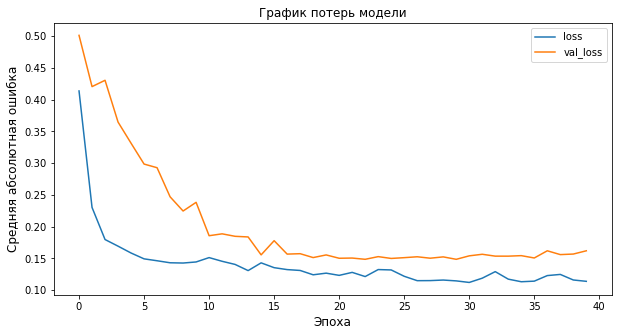

In [126]:
model_loss_plot(history_up)

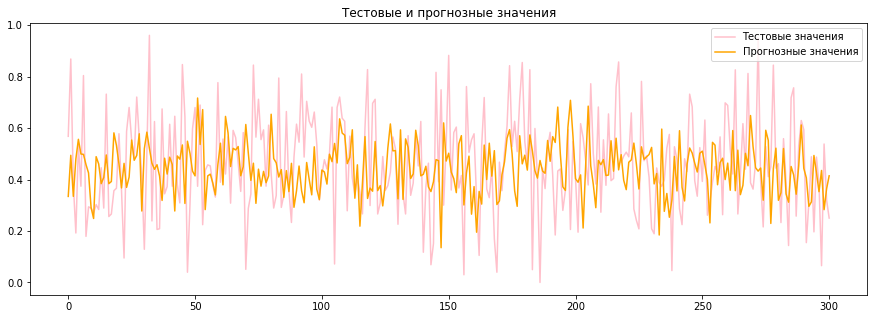

In [127]:
pred_up = model_up.predict(np.array((X_test_up)))
original_up = y_test_up.values
predicted_up = pred_up

actual_and_predicted_plot(original_up, predicted_up)

In [128]:
model_up.evaluate(X_test_up, y_test_up, verbose=1)

10/10 [==============================] - 0s 2ms/step - loss: 0.1678


0.16784045100212097

In [129]:
np.mean(np.abs(y_test_up-np.mean(y_test_up)))

0.1551354766870342

In [130]:
model_up.save(r'models\up_model_0.167')

INFO:tensorflow:Assets written to: models\up_model_2.45\assets


In [131]:
model_up.save_weights(r'models\up_model_2.45\weights')

#### Нейронная сеть для прогноза прочности при растяжении

In [132]:
normalizer_pr = tf.keras.layers.Normalization(axis=-1)

In [133]:
X_train_pr_norm = normalizer_pr.adapt(np.array(X_train_pr))

In [134]:
model_pr = Sequential(X_train_pr_norm)

model_pr.add(Dense(128))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(1))
model_pr.add(Activation('selu'))

In [135]:
early_pr = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [136]:
model_pr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [137]:
%%time
history_pr = model_pr.fit(
    X_train_pr,
    y_train_pr,
    batch_size = 32,
    epochs=300,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr])

Epoch 1/300
18/18 [==============================] - 1s 15ms/step - loss: 0.6665 - val_loss: 0.3650
Epoch 2/300
18/18 [==============================] - 0s 4ms/step - loss: 0.3518 - val_loss: 0.3460
Epoch 3/300
18/18 [==============================] - 0s 4ms/step - loss: 0.2793 - val_loss: 0.3001
Epoch 4/300
18/18 [==============================] - 0s 5ms/step - loss: 0.2382 - val_loss: 0.2559
Epoch 5/300
18/18 [==============================] - 0s 4ms/step - loss: 0.2423 - val_loss: 0.2533
Epoch 6/300
18/18 [==============================] - 0s 4ms/step - loss: 0.1948 - val_loss: 0.2501
Epoch 7/300
18/18 [==============================] - 0s 4ms/step - loss: 0.2018 - val_loss: 0.2244
Epoch 8/300
18/18 [==============================] - 0s 5ms/step - loss: 0.1909 - val_loss: 0.2200
Epoch 9/300
18/18 [==============================] - 0s 6ms/step - loss: 0.1878 - val_loss: 0.2182
Epoch 10/300
18/18 [==============================] - 0s 6ms/step - loss: 0.1811 - val_loss: 0.2060
Epoch 11

In [138]:
model_pr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1536      
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64)               

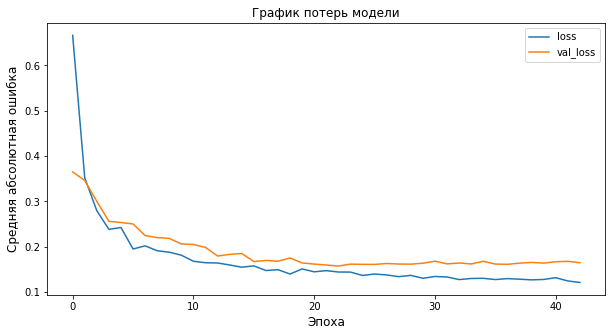

In [139]:
model_loss_plot(history_pr)

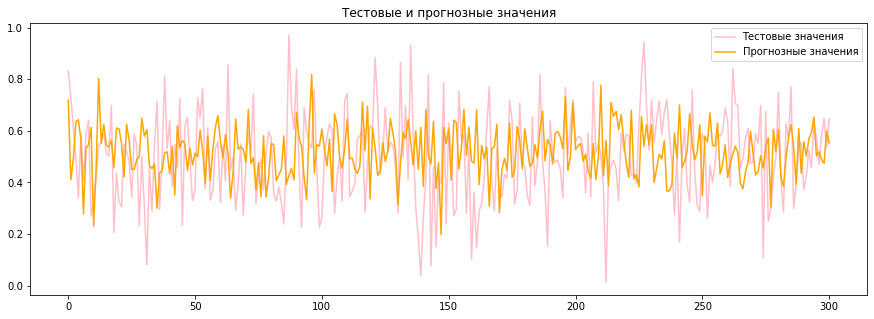

In [140]:
pred_pr = model_pr.predict(np.array((X_test_pr)))
original_pr = y_test_pr.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

In [141]:
model_pr.evaluate(X_test_pr, y_test_pr, verbose=1)

10/10 [==============================] - 0s 1ms/step - loss: 0.1581


0.15809012949466705

In [142]:
np.mean(np.abs(y_test_pr-np.mean(y_test_pr)))

0.13711770311363444

In [143]:
model_pr.save(r'models\pr_model_0.1581')

INFO:tensorflow:Assets written to: models\pr_model_385.51\assets


In [144]:
model_pr.save_weights(r'models\pr_model_0.1581\weights')

#### Нейронная сеть для предсказания соотношения матрица-наполнитель

In [145]:
x_mn = df_std.drop(['Соотношение матрица-наполнитель', ], axis=1)
y_mn = df_std[['Соотношение матрица-наполнитель']]

X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=1)

In [146]:
normalizer_nm = tf.keras.layers.Normalization(axis=-1)

In [147]:
X_train_mn_norm = normalizer_nm.adapt(np.array(X_train_mn))

In [148]:
model_mn = Sequential(X_train_mn_norm)

model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(128, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(64, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(32, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(16, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [149]:
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [150]:
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [151]:
%%time
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn]
    )

Epoch 1/100
9/9 [==============================] - 2s 41ms/step - loss: 0.6614 - val_loss: 0.1891
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 0.2381 - val_loss: 0.2014
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 0.1946 - val_loss: 0.1700
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1760 - val_loss: 0.1783
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1605 - val_loss: 0.1623
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1659 - val_loss: 0.1523
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1498 - val_loss: 0.1577
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 0.1449 - val_loss: 0.1536
Epoch 9/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1416 - val_loss: 0.1478
Epoch 10/100
9/9 [==============================] - 0s 11ms/step - loss: 0.1453 - val_loss: 0.1535
Epoch 11/100
9/9 [=======

In [152]:
model_mn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 64)               

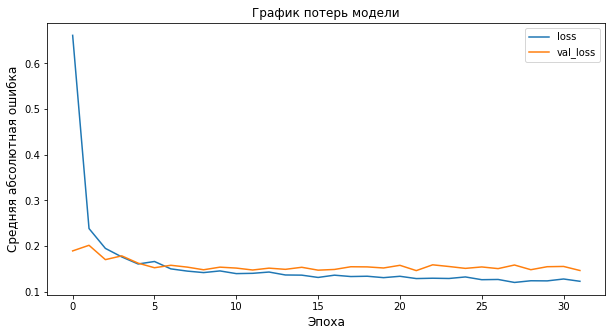

In [153]:
model_loss_plot(history_mn)

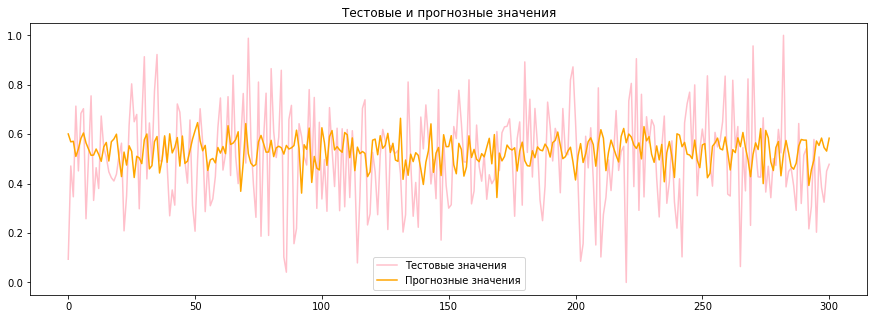

In [154]:
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

In [155]:
model_mn.evaluate(X_test_mn, y_test_mn, verbose=1)

10/10 [==============================] - 0s 2ms/step - loss: 0.1646


0.16461685299873352

In [156]:
np.mean(np.abs(y_test_mn-np.mean(y_test_mn)))

Соотношение матрица-наполнитель    0.1544
dtype: float64

In [157]:
model_mn.save('models/mn_model_0.154')

INFO:tensorflow:Assets written to: models/mn_model_0.7435\assets


In [158]:
model_mn.save_weights('models/mn_model_0.154/weights')